In [1]:
from pylab import *

In [8]:
def Pot_ini_circ(x,y,cc_R=[0,0,0.3],V0=1):
    # x -> i , y -> j
    N_x , N_y = len(x) , len(y)
    M = zeros((N_y,N_x))
    for i in range(1,N_x-1):
        for j in range(1,N_y-1):
            if sqrt( (x[i]-cc_R[0])**2 + (y[j]-cc_R[1])**2 ) < cc_R[2]:
                M[j,i] = V0
            else:
                M[j,i] = rand()
    return M

def Relajar(M,V0=1):
    # Esta funcion relaja todos los terminos excepto los de la frontera y los que tienen V0=1
    N_y,N_x = M.shape
    for i in range(1,N_x-1):
        for j in range(1,N_y-1):
            if M[j,i] == V0 :
                continue
            else:
                M[j,i] = 0.25*(M[j,i+1]+M[j,i-1]+M[j+1,i]+M[j-1,i])
    return M

def Jacobi(M,V0=1,err=1e-4):
    M_ref = copy(M)
    contador , d_max = 0 , 1
    while d_max > err:
        M_ref = copy(M)
        for i in range(10):
             M = Relajar(M)
        difer = abs(M_ref-M)
        d_max = difer.max()
        contador += 10
    print('Solucion con ',contador,' iteraciones')
    return M 

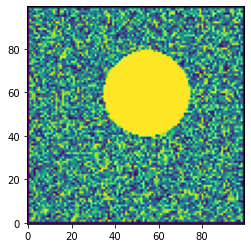

In [56]:
x,y = linspace(-1,1,100) , linspace(-1,1,100)
V = Pot_ini_circ(x,y,[0.1,0.2,0.4])
XX,YY = meshgrid(x,y)
imshow(V,origin='lower')
show()

In [57]:
V = Jacobi(V)

Solucion con  1580  iteraciones


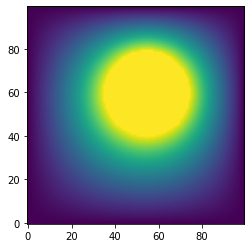

In [58]:
imshow(V,origin='lower')
show()

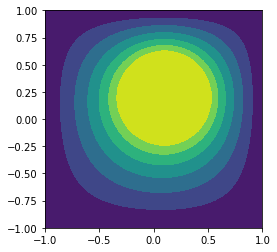

In [64]:
contourf(XX,YY,V)
gca().set_aspect('equal')
show()

In [65]:
def Pot_mastercard(x,y,cc_R=[[0,-0.2,0.3],[0,0.2,0.3]],V0=1):
    # x -> i , y -> j
    N_x , N_y = len(x) , len(y)
    M = zeros((N_y,N_x))
    for i in range(1,N_x-1):
        for j in range(1,N_y-1):
            if sqrt( (x[i]-cc_R[0][0])**2 + (y[j]-cc_R[0][1])**2 ) < cc_R[0][2] or sqrt( (x[i]-cc_R[1][0])**2 + (y[j]-cc_R[1][1])**2 ) < cc_R[1][2]:
                M[j,i] = V0
            else:
                M[j,i] = rand()
    return M

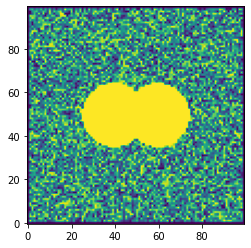

In [68]:
x,y = linspace(-1,1,100) , linspace(-1,1,100)
V = Pot_mastercard(x,y,[[-0.2,0,0.3],[0.2,0,0.3]])
XX,YY = meshgrid(x,y)
imshow(V,origin='lower')
show()

In [69]:
V = Jacobi(V)

Solucion con  1160  iteraciones


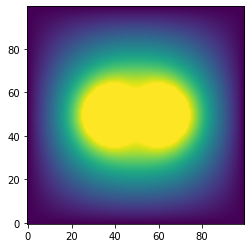

In [70]:
imshow(V,origin='lower')
show()

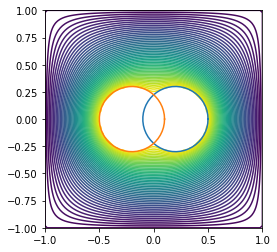

In [82]:
niveles = linspace(0,1,50)
th = linspace(0,2*pi)
c1x,c1y,c2x,c2y = 0.3*(cos(th))+0.2 , 0.3*sin(th) , 0.3*cos(th)-0.2 , 0.3*sin(th)
contour(XX,YY,V,levels=niveles)
plot(c1x,c1y,c2x,c2y)
gca().set_aspect('equal')
show()

In [83]:
def mi_grad(V):
    Ex , Ey = zeros_like(V) , zeros_like(V)
    N_y,N_x = V.shape
    for i in range(1,N_x-1):
        for j in range(1,N_y-1):
            Ex[j,i] = V[j,i+1] - V[j,i-1]
            Ey[j,i] = V[j+1,i] - V[j-1,i]
    return Ex , Ey

In [92]:
Ex,Ey = mi_grad(-V)

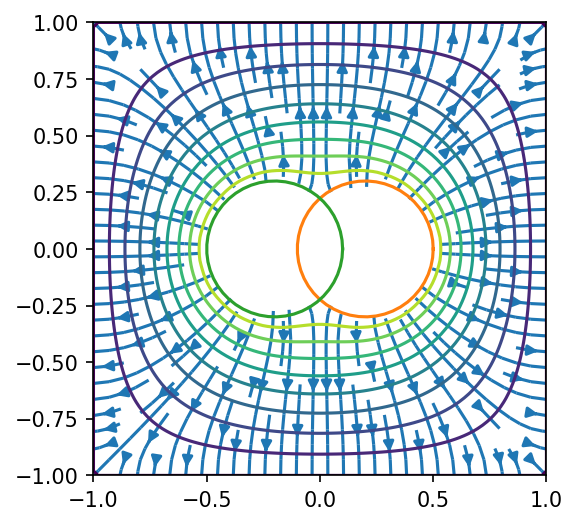

In [103]:
figure(dpi=150)
streamplot(XX,YY,Ex,Ey,density=1,minlength=.01,maxlength=5.0)
niveles = linspace(0,1,10)
contour(XX,YY,V,levels=niveles)
plot(c1x,c1y,c2x,c2y)
gca().set_aspect('equal')
show()